In [3]:
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, transforms


In [30]:
x = np.random.uniform(size=(1,10))

W = np.random.normal(size=(10,2), scale=0.0001)

b = np.random.normal(size=(1,2), scale=0.0001)



In [ ]:
def linear_forward(x, W, b):

    out = x @ W + b

    cache = (x, W, b)

    return out, cache


def linear_backward(dout, cache):
    """

    Backwardpass

    
    """

    x, W, b = cache



    return dx, dW, db



In [ ]:

def softmax(logits):
    
    C = np.max(logits, axis=1, keepdims=True)
    logits_safe = logits - C
    exp = np.exp(logits_safe)
    exp_total = np.sum(exp, axis=1, keepdims=True)
    exp /= exp_total

    return exp, cache

def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
     
    # softmax

    x_probs = softmax(x)


    loss = -1 * np.log(x_probs[:,y])
    loss = np.average(loss) #average accross batch
    
    return loss, dx

In [31]:

y = x @ W + b

dW = np.zeros((10,2)) + x.T
print(dW.shape)
print(dW)
print(x.T)

(10, 2)
[[0.25951573 0.25951573]
 [0.95734872 0.95734872]
 [0.66149734 0.66149734]
 [0.18610636 0.18610636]
 [0.6964075  0.6964075 ]
 [0.69963787 0.69963787]
 [0.02109802 0.02109802]
 [0.0160121  0.0160121 ]
 [0.09372564 0.09372564]
 [0.54730462 0.54730462]]
[[0.25951573]
 [0.95734872]
 [0.66149734]
 [0.18610636]
 [0.6964075 ]
 [0.69963787]
 [0.02109802]
 [0.0160121 ]
 [0.09372564]
 [0.54730462]]


In [12]:
def softmax(logits):
    """ 
    Scales values to between 0-1. Largest value takes majority of weight but not all (softmax). Sensativity is exponential (e^x)
    Input: (Batch, N)
    Output: (Batch, N)
    """

    C = np.max(logits, axis=1, keepdims=True)
    logits_scaled = logits - C
    exp = np.exp(logits_scaled)
    exp_total = np.sum(exp, axis=1, keepdims=True)
    exp /= exp_total

    return exp

In [32]:
logs = dict()

logs['iter'] = []
logs['loss'] = []

curr_iter = 0

In [33]:
lr = 0.1

In [34]:
n_train, W, H = train_images.shape

batch_size = 1
shuffled_index = np.random.permutation(n_train)  # Shuffle all indices
curr_index = 0

In [55]:
W1 = np.random.normal(size=(W*H,10), scale=0.0001)
last_W1 = np.copy(W1)
lowest_loss = 1e10


In [61]:

for i in range(1000):

    curr_iter += 1

    # Get batch of data
    batch = train_images[shuffled_index[curr_index:curr_index+batch_size]]
    batch_label = train_labels[shuffled_index[curr_index:curr_index+batch_size]]
    batch = batch.reshape(batch_size,-1)
    # curr_index += batch_size

    # Make Prediction
    y1 = batch @ W1

    # Calc Loss

    # soft max
    probs = softmax(y1)
    loss = -1 * np.log(probs[:,batch_label])
    loss = np.average(loss) #average accross batch

    if loss >= lowest_loss: # you didn't improve, clear last mutation
        W1 = last_W1

    else:
        lowest_loss = loss
        print(loss)
    W1_grad = np.random.normal(size=(W*H,10), scale=0.0001)
    last_W1 = np.copy(W1)
    W1 =  W1 - W1_grad * lr


    logs['loss'].append(loss)
    logs['iter'].append(curr_iter)

    # Adjust Parameters...

    

    

7.381650846154984e-12
7.193357021177186e-12
7.092992859750356e-12
6.973532862299849e-12
6.629363724663709e-12
6.4259708665510525e-12
6.273204178361661e-12
6.187272916255139e-12
6.0638161159160646e-12
6.062039759076654e-12
5.89639448380159e-12
5.795142143955184e-12
5.536682223820983e-12
5.4354298839746135e-12
5.361266985929252e-12
5.279110482106554e-12
5.169198402668089e-12
5.0983661736966405e-12
5.053513163501556e-12
4.948930154581344e-12
4.896305583213852e-12
4.8132609009714874e-12
4.610534176673978e-12
4.575229084490737e-12
4.438671652461227e-12
4.413136522894735e-12
4.1955328100672675e-12
4.0876191320732556e-12
4.078737347876218e-12
4.033662293076254e-12
3.932409953230037e-12
3.889111255269486e-12
3.670175274812578e-12
3.451461338960643e-12
3.4450220454177948e-12
3.3588687387065894e-12
3.2132074778752903e-12
3.187006214494053e-12
3.1514790777059353e-12
3.0955238372646525e-12
2.9976021664924156e-12
2.957412093000865e-12
2.9205526885832015e-12
2.841282764624737e-12
2.820410571761725e-

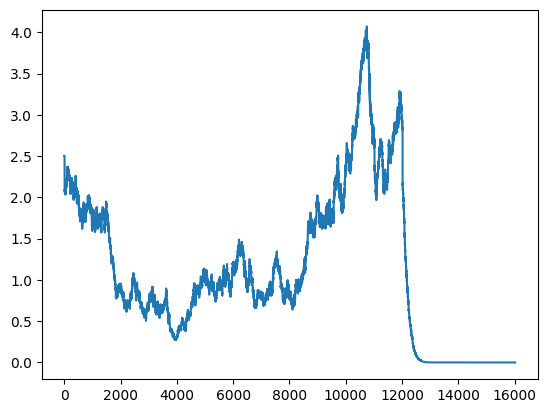

In [62]:
plt.plot(logs['loss'])
plt.show()

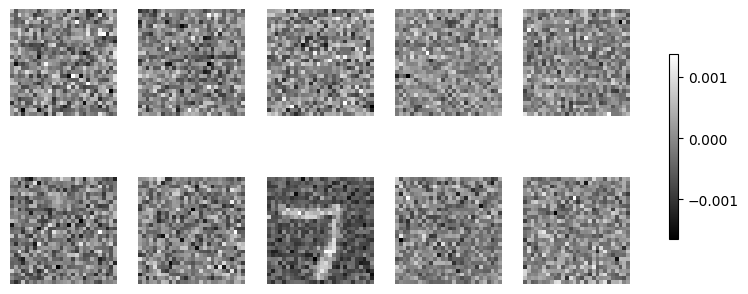

In [63]:

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    img = W1[:, i].reshape(W, H)  # Reshape into an image
    im = ax.imshow(img, cmap='gray')
    ax.axis('off')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.show()